<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

In [23]:
train_df = pd.read_csv("train.csv")

In [24]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The dataset has 1460 rows and 81 columns.


In [26]:
print(round(train_df.isna().sum()/train_df.shape[0] * 100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


Dropping columns with over 20% NaN values

In [27]:
clean_df = train_df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [28]:
clean_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
clean_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [31]:
# fill the nan values
from sklearn.impute import SimpleImputer
import numpy as np

# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# For Numerical Columns
num_col = clean_df.loc[:,clean_df.dtypes!=object].columns
num_mean.fit(clean_df[num_col])

clean_df[num_col] = num_mean.transform(clean_df[num_col])

In [32]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [33]:
# fill the rows with NA value
obj_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# For String Columns
obj_col = clean_df.loc[:,clean_df.dtypes==object].columns
obj_mean.fit(clean_df[obj_col])

clean_df[obj_col] = obj_mean.transform(clean_df[obj_col])

In [34]:
clean_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [35]:
clean_df['YrSold'].value_counts()

YrSold
2009.0    338
2007.0    329
2006.0    314
2008.0    304
2010.0    175
Name: count, dtype: int64

In [65]:
# Convert YrSold to int
clean_df['YrSold'] = clean_df['YrSold'].astype('int')
clean_df['MoSold'] = clean_df['MoSold'].astype('int')
clean_df['GarageYrBlt'] = clean_df['GarageYrBlt'].astype('int')

In [66]:
MoSold = clean_df['MoSold'].value_counts().sort_index()
YrSold = clean_df['YrSold'].value_counts().sort_index()

In [45]:
len(YrSold)

5

In [67]:
import matplotlib.pyplot as plt

def add_labls(x,y):
  for k in range(len(x)):
    plt.text(x[k],y[k],str(y[k]),ha='center',va='bottom')

In [55]:
YrSold.index

Index([2006, 2007, 2008, 2009, 2010], dtype='int64', name='YrSold')

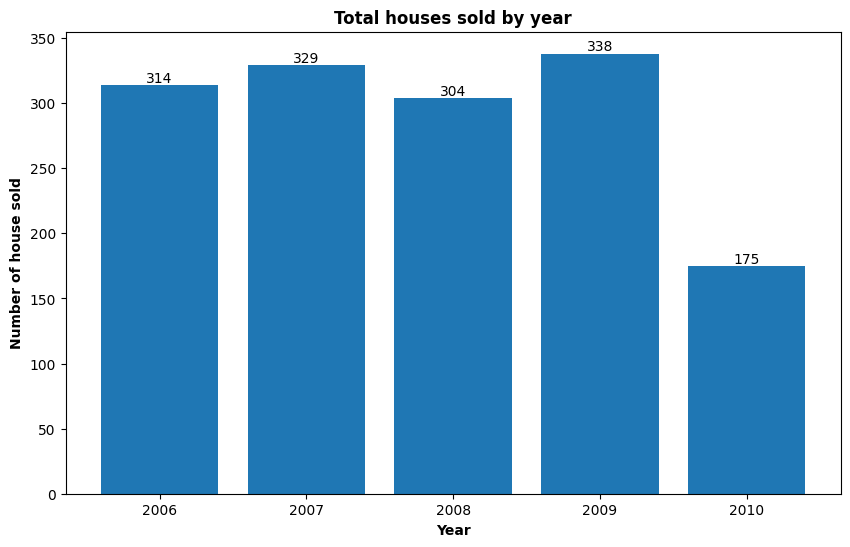

In [61]:
# Total houses sold by year
plt.figure(figsize=(10,6))

plt.bar(YrSold.index,YrSold.values)
add_labls(YrSold.index,YrSold.values)
plt.xlabel('Year',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by year',weight='bold')

plt.show()

In [68]:
print(MoSold)

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: count, dtype: int64


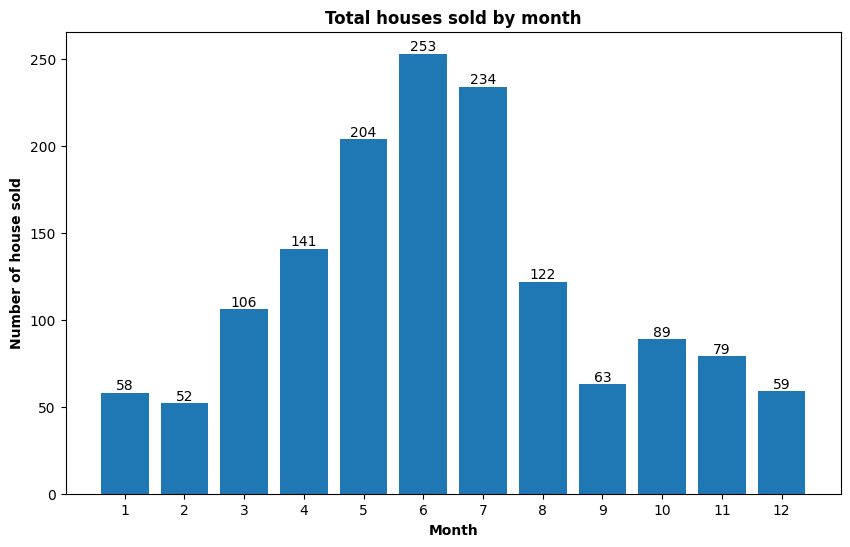

In [74]:
#Total houses sold by month
plt.figure(figsize=(10,6),dpi=100)

plt.bar(MoSold.index,MoSold.values)
add_labls(MoSold.index,MoSold.values)
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by month',weight='bold')
plt.xticks(MoSold.index)

plt.show()

In [82]:
# Type of road access to property
road_type = clean_df['Street'].value_counts().sort_index()

In [83]:
print(road_type)

Street
Grvl       6
Pave    1454
Name: count, dtype: int64


In [85]:
clean_df['YearRemodAdd']

0       2003.0
1       1976.0
2       2002.0
3       1970.0
4       2000.0
         ...  
1455    2000.0
1456    1988.0
1457    2006.0
1458    1996.0
1459    1965.0
Name: YearRemodAdd, Length: 1460, dtype: float64

In [96]:
# Remodeled Year
clean_df['YearRemodAdd'] = clean_df['YearRemodAdd'].astype('int')
remodeled_year = clean_df['YearRemodAdd'].value_counts().sort_values(ascending=False)
remodeled_year = remodeled_year[:10].sort_index()
print(remodeled_year)

YearRemodAdd
1950    178
1996     36
2000     55
2002     48
2003     51
2004     62
2005     73
2006     97
2007     76
2008     40
Name: count, dtype: int64


In [112]:
df = pd.DataFrame(remodeled_year,index=remodeled_year.index)
df

,count
YearRemodAdd,
1950,178
1996,36
2000,55
2002,48
2003,51
2004,62
2005,73
2006,97
2007,76


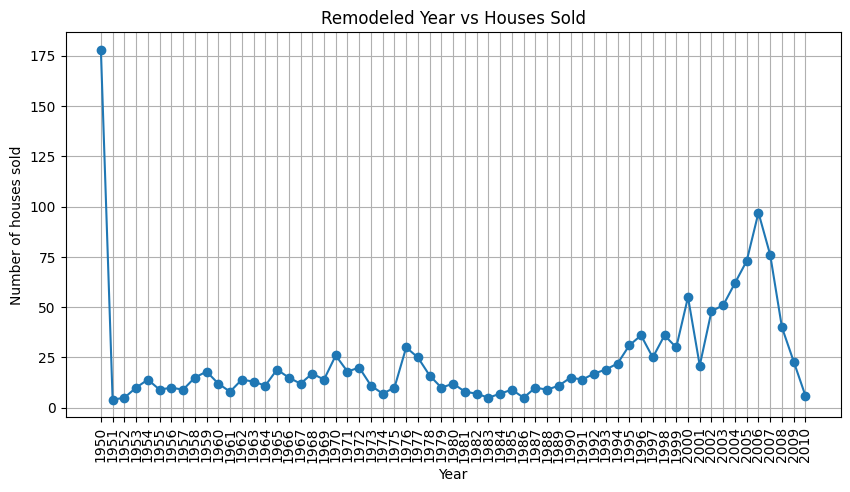

In [115]:
# Line plot
# Houses sold by Year Remodeled

clean_df['YearRemodAdd'] = clean_df['YearRemodAdd'].astype('int')
remodeled_year = clean_df['YearRemodAdd'].value_counts().sort_index()

x = list(remodeled_year.index)
y = list(remodeled_year.values)

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')
plt.xticks(x,rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of houses sold')
plt.title('Remodeled Year vs Houses Sold')
plt.grid(True)
plt.show()

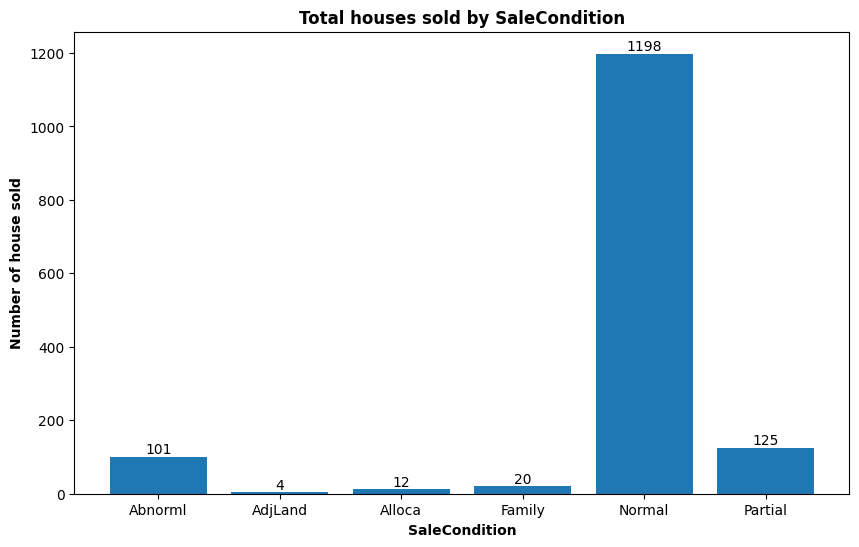

In [116]:
#Total houses sold by SaleCondition
sale_condition = clean_df['SaleCondition'].value_counts().sort_index()

plt.figure(figsize=(10,6),dpi=100)

plt.bar(sale_condition.index,sale_condition.values)
add_labls(sale_condition.index,sale_condition.values)
plt.xlabel('SaleCondition',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by SaleCondition',weight='bold')
plt.xticks(sale_condition.index)

plt.show()